# 2022BCS0129 LAKAVATH RAGHURAM

# Build an LSTM Model to Detect an Automated Spam E-mail Using Common Natural Language Processing.

In [ ]:
#!pip install kaggle==1.6.17 --force
!mkdir -p ~/.kaggle
!echo '{"username":"lakavath*****ram","key":"e12d5v5854d0******4249a512uebndadb"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download bayes2003/emails-for-spam-or-ham-classification-trec-2007


Dataset URL: https://www.kaggle.com/datasets/bayes2003/emails-for-spam-or-ham-classification-trec-2007
License(s): ODbL-1.0
 94% 452M/483M [00:01<00:00, 366MB/s]
100% 483M/483M [00:01<00:00, 420MB/s]


In [3]:
!unzip emails-for-spam-or-ham-classification-trec-2007.zip


Archive:  emails-for-spam-or-ham-classification-trec-2007.zip
  inflating: email_origin.csv        
  inflating: email_text.csv          
  inflating: trec07p.tgz             


In [48]:
# Install NLTK stopwords
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df = pd.read_csv("email_text_lstm.csv")
df.head()


,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...


In [31]:
df['label'] = df['label'].astype(int)


In [32]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)        # remove punctuation & numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in STOPWORDS]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,label,text,clean_text
0,1,do you feel the pressure to perform and not ri...,feel pressure perform rising occasion try v ia...
1,0,hi i've just updated from the gulus and i chec...,hi ive updated gulus check mirrors seems littl...
2,1,mega authenticv i a g r a discount pricec i a ...,mega authenticv g r discount pricec l discount...
3,1,hey billy it was really fun going out the othe...,hey billy really fun going night talking said ...
4,1,system of the home it will have the capabiliti...,system home capabilities linked far know withi...


In [33]:
MAX_WORDS = 10000
MAX_LEN = 200

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['clean_text'])

X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=MAX_LEN)

y = df['label'].values


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
model = Sequential([
    Embedding(MAX_WORDS, 64, input_length=MAX_LEN),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    X_train, y_train,
    epochs=1,
    batch_size=64,
    validation_split=0.1
)


604/604 ━━━━━━━━━━━━━━━━━━━━ 239s 297ms/step - accuracy: 0.9250 - loss: 0.2031 - val_accuracy: 0.9905 - val_loss: 0.0347


In [38]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
604/604 ━━━━━━━━━━━━━━━━━━━━ 180s 296ms/step - accuracy: 0.9901 - loss: 0.0408 - val_accuracy: 0.9909 - val_loss: 0.0378
Epoch 2/5
604/604 ━━━━━━━━━━━━━━━━━━━━ 179s 296ms/step - accuracy: 0.9945 - loss: 0.0201 - val_accuracy: 0.9907 - val_loss: 0.0384
Epoch 3/5
604/604 ━━━━━━━━━━━━━━━━━━━━ 201s 295ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.9907 - val_loss: 0.0386
Epoch 4/5
604/604 ━━━━━━━━━━━━━━━━━━━━ 178s 295ms/step - accuracy: 0.9971 - loss: 0.0108 - val_accuracy: 0.9916 - val_loss: 0.0474
Epoch 5/5
604/604 ━━━━━━━━━━━━━━━━━━━━ 179s 296ms/step - accuracy: 0.9972 - loss: 0.0090 - val_accuracy: 0.9923 - val_loss: 0.0516


In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


336/336 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step
Accuracy: 0.9924538848518726

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4779
           1       0.99      1.00      0.99      5955

    accuracy                           0.99     10734
   macro avg       0.99      0.99      0.99     10734
weighted avg       0.99      0.99      0.99     10734


Confusion Matrix:
 [[4714   65]
 [  16 5939]]


In [41]:
def predict_email(text):
    clean = clean_text(text)
    seq = tokenizer.texts_to_sequences([clean])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    pred = model.predict(padded)[0][0]

    if pred > 0.5:
        return "SPAM EMAIL"
    else:
        return "HAM (Not Spam)"

print(predict_email("Congratulations! You've won a free iPhone. Click here!"))
print(predict_email("Please send me the updated project report."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
SPAM EMAIL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
SPAM EMAIL


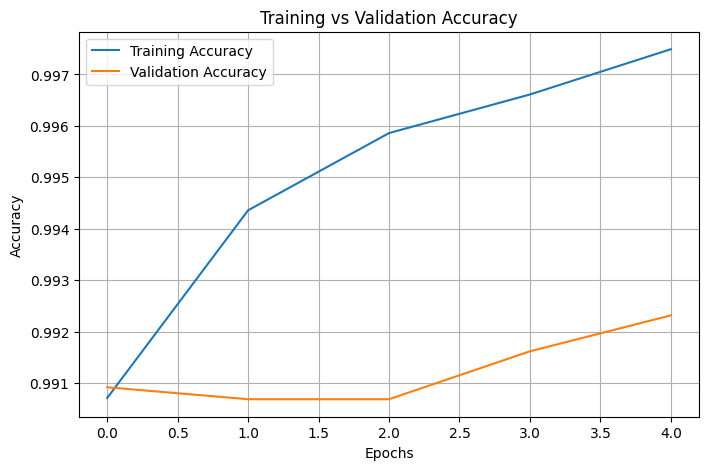

In [44]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


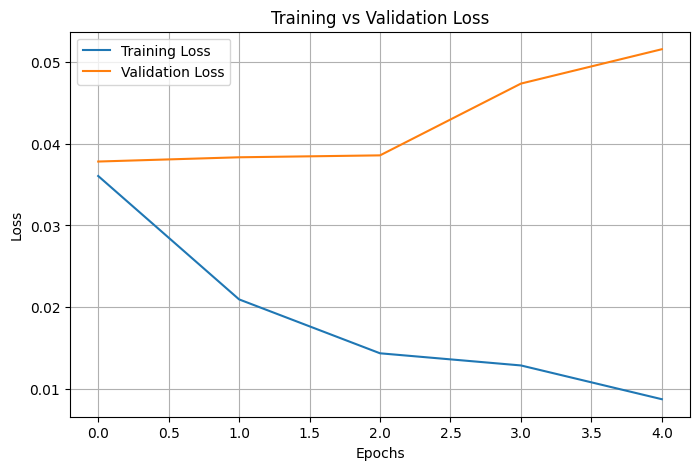

In [45]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


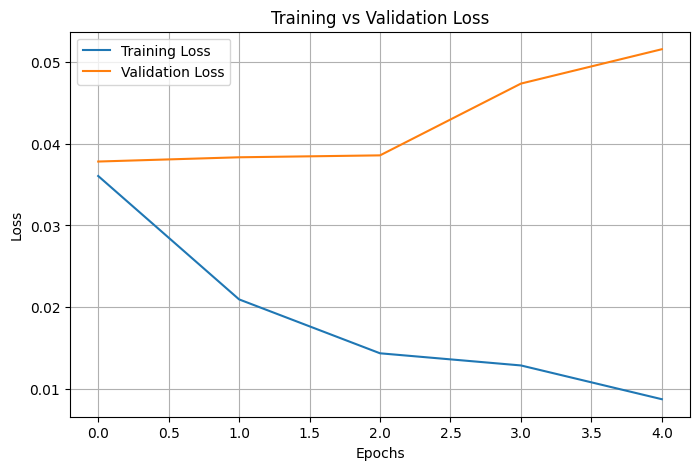

In [46]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


336/336 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


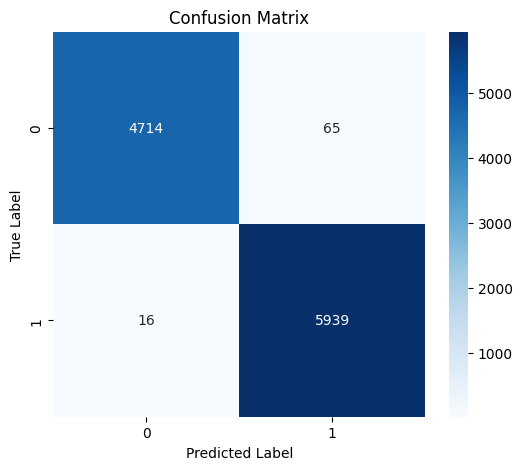

In [49]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [50]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4779
           1       0.99      1.00      0.99      5955

    accuracy                           0.99     10734
   macro avg       0.99      0.99      0.99     10734
weighted avg       0.99      0.99      0.99     10734



In [51]:
acc = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", acc)


Final Model Accuracy: 0.9924538848518726


In [52]:
def predict_email(text):
    clean = clean_text(text)
    seq = tokenizer.texts_to_sequences([clean])
    padded = pad_sequences(seq, maxlen=MAX_LEN)
    pred = model.predict(padded)[0][0]

    if pred > 0.5:
        return "SPAM"
    else:
        return "HAM"

print(predict_email("Congratulations! You've won a free gift card!"))
print(predict_email("Please send the project report by 5 PM."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
SPAM
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
SPAM


336/336 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step


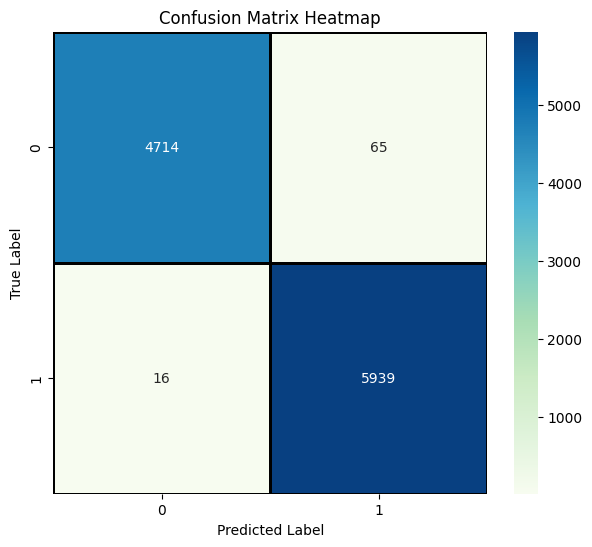

In [53]:
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', linewidths=2, linecolor='black')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [54]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.9966    0.9864    0.9915      4779
           1     0.9892    0.9973    0.9932      5955

    accuracy                         0.9925     10734
   macro avg     0.9929    0.9919    0.9924     10734
weighted avg     0.9925    0.9925    0.9924     10734



In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:   ", recall)
print("F1 Score: ", f1)


Accuracy:  0.9924538848518726
Precision: 0.9891738840772818
Recall:    0.9973131821998321
F1 Score:  0.9932268584329793


336/336 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step


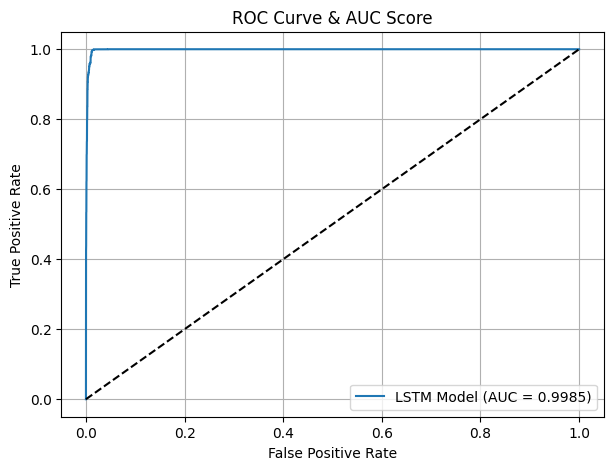

AUC Score: 0.9985029135830581


In [56]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='LSTM Model (AUC = %0.4f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve & AUC Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc)


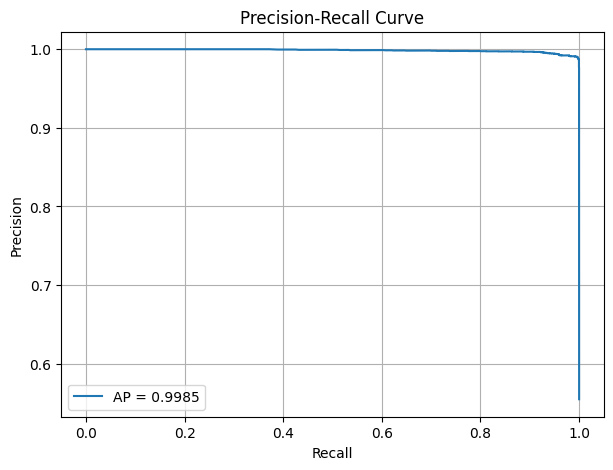

Average Precision Score: 0.9985350988669506


In [57]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(7,5))
plt.plot(recall_vals, precision_vals, label='AP = %0.4f' % avg_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

print("Average Precision Score:", avg_precision)


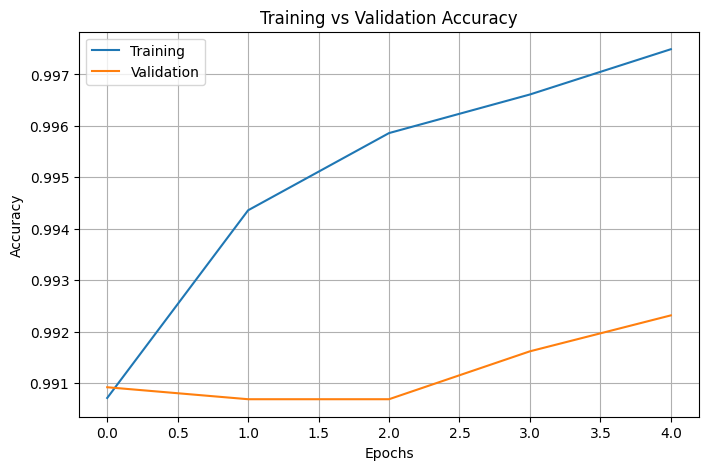

In [58]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


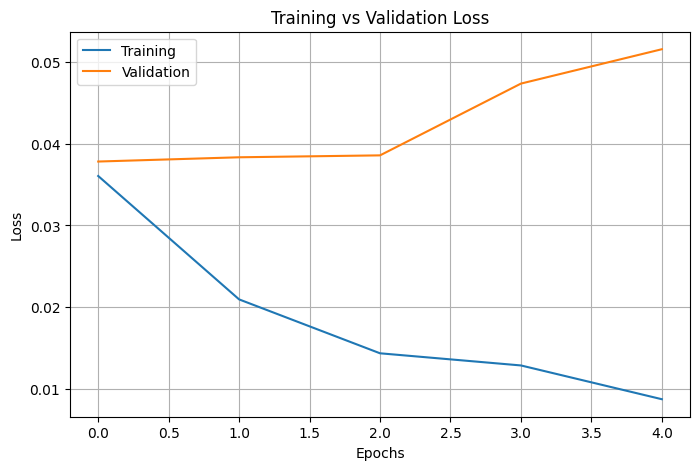

In [59]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [60]:
import pandas as pd

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC", "Average Precision"],
    "Score": [accuracy, precision, recall, f1, roc_auc, avg_precision]
})

metrics_df


,Metric,Score
0,Accuracy,0.992454
1,Precision,0.989174
2,Recall,0.997313
3,F1-Score,0.993227
4,AUC,0.998503
5,Average Precision,0.998535


In [61]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,025,413 (7.73 MB)

 Trainable params: 675,137 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,350,276 (5.15 MB)